# Going further: The "Holoviz" visualization and dashboarding toolkit

[GeoHackWeek 2019](https://geohackweek.github.io) -- [vector tutorial](https://geohackweek.github.io/vector/)   
[Friedrich Knuth, University of Washington](https://github.com/friedrichknuth/). 2019-9-9

In [1]:
import cartopy.crs as ccrs
import holoviews as hv
import geoviews as gv
from geoviews import opts
from holoviews.streams import PointDraw
import panel as pn

hv.extension('bokeh')

ModuleNotFoundError: No module named 'panel'

In [ ]:
# On pangeo, uncomment this line to install this package not present in the pangeo conda environment
# !conda install -y -c conda-forge contextily

In [4]:
OpenTopoMap       = 'https://tile.opentopomap.org/{Z}/{X}/{Y}.png'
OpenStreetMap     = 'http://tile.openstreetmap.org/{Z}/{X}/{Y}.png'
GoogleHybrid      = 'https://mt1.google.com/vt/lyrs=y&x={X}&y={Y}&z={Z}'
GoogleSatellite   = 'https://mt1.google.com/vt/lyrs=s&x={X}&y={Y}&z={Z}'
GoogleRoad        = 'https://mt1.google.com/vt/lyrs=m&x={X}&y={Y}&z={Z}'
GoogleTerrain     = 'http://mt0.google.com/vt/lyrs=p&hl=en&x={X}&y={Y}&z={Z}'
GoogleTerrainOnly = 'http://mt0.google.com/vt/lyrs=t&hl=en&x={X}&y={Y}&z={Z}'
ESRIImagery       = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'
Wikimedia         = 'https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'

url = GoogleSatellite

# Select vertices from a tiled basemap

In [5]:
lon = -122.3118
lat = 47.6534
delta = 0.001

In [6]:
extents = (lon-delta, lat-delta, lon+delta, lat+delta)
tiles = gv.WMTS(url, extents=extents)

In [7]:
location = gv.Points([], vdims="vertices_label")
point_stream = PointDraw(source=location)

In [10]:
#error no attribute 'Points' why????
base_map = (tiles * location).opts(opts.Points(width=500, 
                                                 height=500, 
                                                 size=5, 
                                                 color='blue', 
                                                 tools=["hover"]))

app = pn.panel(base_map)
app

AttributeError: type object 'opts' has no attribute 'Points'

In [11]:
df = gv.operation.project_points(point_stream.element).dframe()
df

,x,y,vertices_label


# save tiled basemap as geotif

In [13]:
##contextily already installed in environment so why does it not import? 
import contextily
from contextily.tile import bounds2raster

ModuleNotFoundError: No module named 'contextily'

In [14]:
url              = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}"
output_file_name = 'output.tif'
w, s, e, n       = (lon-delta, lat-delta, lon+delta, lat+delta)

img = bounds2raster(
        w,
        s,
        e,
        n,
        output_file_name,
        zoom="auto",
        url=url,
        ll=True,
        wait=0,
        max_retries=100)

NameError: name 'bounds2raster' is not defined

In [15]:
! gdalinfo output.tif

ERROR 4: output.tif: No such file or directory
gdalinfo failed - unable to open 'output.tif'.


# plot the geotif

In [16]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

In [17]:
source = rasterio.open(output_file_name)

RasterioIOError: output.tif: No such file or directory

NameError: name 'source' is not defined

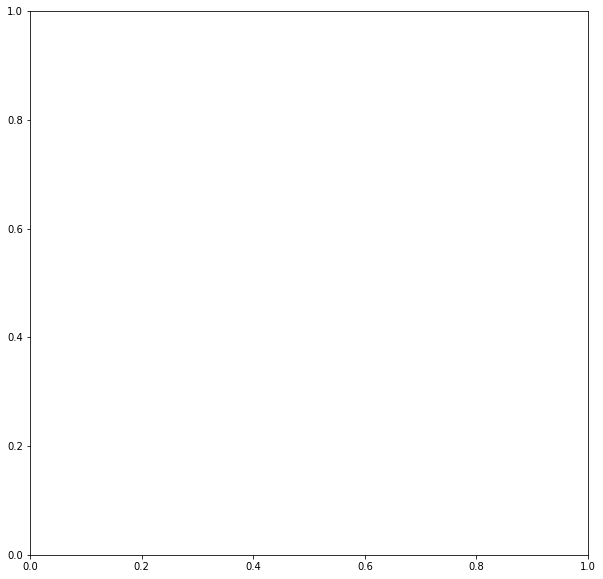

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
show(source.read(), 
     transform=source.transform, 
     ax=ax)
ax.ticklabel_format(useOffset=False, style='plain', axis='both')

# plot vertices on top of geotif

In [19]:
from shapely.geometry import Point, Polygon
import geopandas as gpd

In [20]:
# this is the projection the tiles are returned in
epsg_code = '3857'

In [21]:
geometry = [Point(xy) for xy in zip(df['x'], df['y'])]
gdf = gpd.GeoDataFrame(df,geometry=geometry, crs={'init':'epsg:'+epsg_code})

NameError: name 'source' is not defined

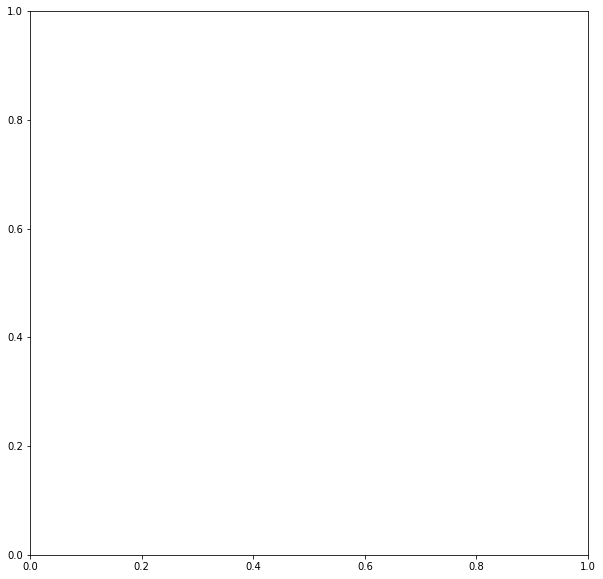

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
show(source.read(), 
     transform=source.transform, 
     ax=ax)
ax.ticklabel_format(useOffset=False, style='plain', axis='both')
gdf.plot(ax=ax, color='blue')

# plot vertices as polygon on top of raster basemap

In [23]:
vertices = []
for i in range(len(df)):
    vertex = (df['x'][i], df['y'][i])
    vertices.append(vertex)
polygon = Polygon(vertices)
polygon_gdf = gpd.GeoDataFrame(gpd.GeoSeries(polygon), 
                                          columns=['geometry'],
                                          crs={'init':'epsg:'+epsg_code}) 

NameError: name 'source' is not defined

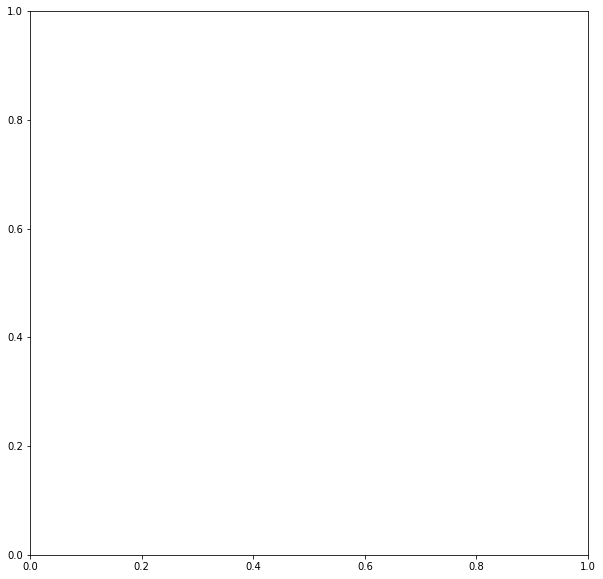

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
show(source.read(), 
     transform=source.transform, 
     ax=ax)
ax.ticklabel_format(useOffset=False, style='plain', axis='both')
gdf.plot(ax=ax, color='blue')
polygon_gdf.plot(ax=ax)

# BONUS!

# get the basemap projected in UTM

In [25]:
import utm

ModuleNotFoundError: No module named 'utm'

In [26]:
url   = 'https://mt1.google.com/vt/lyrs=s&x={X}&y={Y}&z={Z}'

u = utm.from_latlon(lat,lon)
utm_lon           = u[0]
utm_lat           = u[1]
utm_zone          = u[2]
utm_zone_code     = u[3]
dx  = dy = 100

NameError: name 'utm' is not defined

In [27]:
extents = utm_lon-dx, utm_lat-dy, utm_lon+dx, utm_lat+dy
tiles = gv.WMTS(url, extents=extents, crs=ccrs.UTM(utm_zone))

NameError: name 'utm_lon' is not defined

In [28]:
location = gv.Points([], vdims="location", crs=ccrs.UTM(utm_zone))
point_stream = PointDraw(source=location)

NameError: name 'utm_zone' is not defined

In [29]:
base_map = (tiles * location).opts(gv.opts.Points(width=500, 
                                                 height=500, 
                                                 size=5, 
                                                 color='blue', 
                                                 tools=["hover"]))

AttributeError: type object 'opts' has no attribute 'Points'

In [30]:
app = pn.panel(base_map)
app

NameError: name 'pn' is not defined

In [31]:
projected = gv.operation.project_points(point_stream.element, projection=ccrs.UTM(utm_zone))
projected.dframe()

NameError: name 'utm_zone' is not defined

# reproject the raster to utm and plot

In [32]:
import math

In [33]:
# function to get utm epsg code from wgs84 lon lat values
def wgs_lon_lat_to_utm_epsg_code(lon, lat):
    utm_band = str((math.floor((lon + 180) / 6 ) % 60) + 1)
    if len(utm_band) == 1:
        utm_band = '0'+utm_band
    if lat >= 0:
        epsg_code = '326' + utm_band
    else:
        epsg_code = '327' + utm_band
    return epsg_code

In [34]:
epsg_code = wgs_lon_lat_to_utm_epsg_code(lon, lat)
reprojected_output_file_name = 'output_EPSG_'+epsg_code+'.tif'

In [35]:
! rm {reprojected_output_file_name}

rm: output_EPSG_32610.tif: No such file or directory


In [36]:
# change the projection using gdal
! gdalwarp -co COMPRESS=LZW -co TILED=YES -co BIGTIFF=IF_SAFER -r cubic -t_srs EPSG:{epsg_code} {output_file_name} {reprojected_output_file_name}

ERROR 4: output.tif: No such file or directory


In [37]:
src = rasterio.open(reprojected_output_file_name)

RasterioIOError: output_EPSG_32610.tif: No such file or directory

NameError: name 'src' is not defined

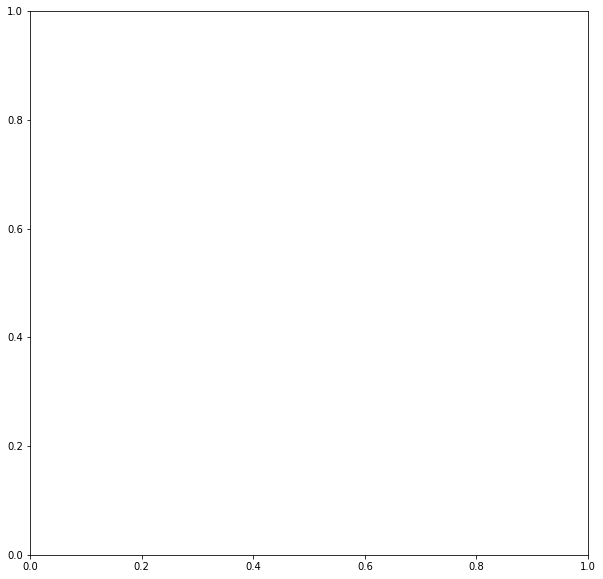

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
show(src.read(), 
     transform=src.transform, 
     ax=ax)
ax.ticklabel_format(useOffset=False, style='plain', axis='both')

<div class="alert alert-success" style="font-size:100%">
<b style="font-size:120%">Exercise</b></br></br>

**Can you reproject and plot the vertices and ploygon on top of the UTM projected raster?**

*Hint:* Geopandas has a built in function to do this.  You will need to provide the correct epsg code, which you can get with the wgs_lon_lat_to_utm_epsg_code(lon, lat) function defined in this notebook.

</div>

<div class="alert alert-info" style="font-size:100%">

See further examples at https://holoviz.org/tutorial/index.html

</div>